# Visualization: Heat maps

##### Heat maps: Heat maps can be useful to visualize the correlation between different features, such as the engagement metrics and other variables you may have in your dataset. For example, you can create a heat map to analyze the correlation between the number of engagements and the presence of fact-checking articles over time.

## Initialization

Import the required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the cleaned data set to a pandas DataFrame

In [3]:
df = pd.read_csv("cleaned_dataset.csv")

Convert the "Date posted" column to datetime format:

In [4]:
df["Date posted"] = pd.to_datetime(df["Date posted"])

## Plotting of Heatmap

##### To create a heatmap to analyze the correlation between the number of engagements and the presence of fact-checking articles over time, you can follow these steps:

1. Create a new column in your dataset to indicate the presence of fact-checking articles. For example, you can create a binary column called "fact_checked" that takes the value 1 if the tweet was right after the release dates of the fact checking articles, and 0 otherwise.

In [5]:
fact_check_release_date = '2019-4-25'  # Replace with the release date of the fact-checking articles
df['fact_checked'] = (df['Date posted'] >= fact_check_release_date).astype(int)

2. Select the relevant columns for your analysis, such as the engagement metrics (Likes, Replies, Retweets, and Quote Tweets), the fact_checked column, and the Date posted column.


In [6]:
columns = ['Date posted', 'Likes', 'Replies', 'Retweets', 'Quote Tweets', 'fact_checked']
data = df[columns]

3. Group the data by date and fact_checked columns and calculate the sum of the engagement metrics for each group. This will give you the total number of engagements for tweets on each day, grouped by whether a fact-checking article was published on the same day.

In [7]:
grouped_data = data.groupby(['Date posted', 'fact_checked']).sum().reset_index()

4. Pivot the data so that the fact_checked values become the columns and the dates become the rows, with the total number of engagements as the values.


In [8]:
pivot_table = pd.pivot_table(grouped_data, values=['Likes', 'Replies', 'Retweets', 'Quote Tweets'], index=['Date posted'], columns=['fact_checked'])

5. Create a heatmap using the pivoted data to visualize the correlation between the number of engagements and the presence of fact-checking articles over time.

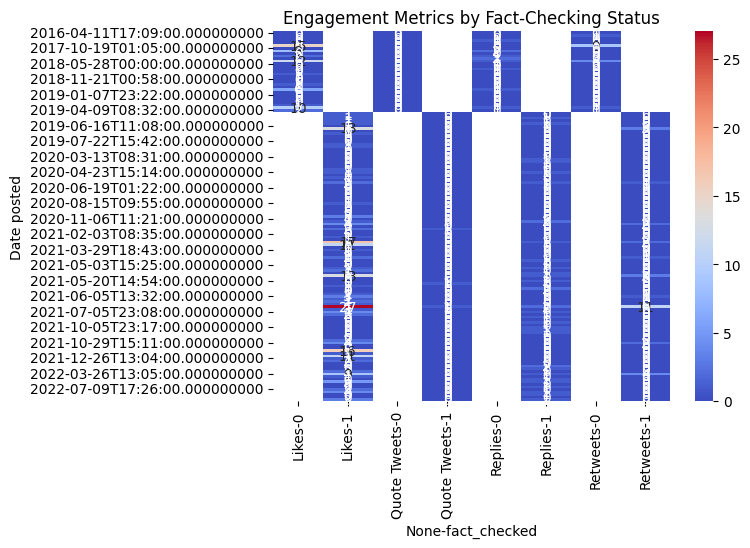

In [9]:
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Engagement Metrics by Fact-Checking Status')
plt.show()